(window)=
# Fensterung anwenden

## Lernziele für den Abschnitt *Fensterung anwenden*

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für den Abschnitt:</b></div>
    <ul>
        <li> Möglichkeiten der Fensterung von Signalen bewerten </li>
        <li> mithilfe von spektralen Eigenschaften </li>
        <li> um die Auswirkung auf Messergebnisse im Frequenzbereich zu bewerten </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
import numpy as np
import scipy
from scipy.stats import norm
from scipy import signal
from scipy.fft import fft, fftshift
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable
import IPython.display
from IPython.display import display, Latex, IFrame

print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)
print('IPython.display', IPython.display)
print('schemdraw', schemdraw.__version__)

matplotlib 3.7.1
numpy 1.24.2
scipy 1.10.1
pandas 1.5.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>
IPython.display <module 'IPython.display' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/IPython/display.py'>
schemdraw 0.15


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Kurzzeitspektralanalyse - was ist das?

![Spektrum](../img/spectrum.png)

Das Bild {cite:p}`werner_digitale_2019` zeigt eine typische DFT- bzw. FFT-Anwendung zur Spektralanalyse von Messdaten.
- Ein Tiefpassfilter sorgt für die notwendige Bandbegrenzung vor der A/D-Umsetzung.
- Zur Spektralanalyse mit der FFT werden Ausschnitte $x_w[n]$ der laufend anfallenden Folge $x[n]$ entnommen. Man spricht von einer **Fensterung** des Signals.
- Bei der Echtzeitsignalverarbeitung werden dem Signal sukzessive Blöcke entnommen und transformiert, so dass sich das Fenster anschaulich gesprochen über die Signalfolge schiebt.

## Anwendungsbeispiele für die Kurzzeitspektralanalyse

<a title="GfMmbH, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Ordnungsspektrum_bei_erkanntem_Verzahnungsschaden.jpg"><img width="512" alt="Ordnungsspektrum bei erkanntem Verzahnungsschaden" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Ordnungsspektrum_bei_erkanntem_Verzahnungsschaden.jpg/512px-Ordnungsspektrum_bei_erkanntem_Verzahnungsschaden.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Ordnungsspektrum_bei_erkanntem_Verzahnungsschaden.jpg">GfMmbH</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

Schwingungsdiagnose: Ordnungsspektrum bei erkanntem Verzahnungsschaden

In [3]:
IFrame("https://commons.wikimedia.org/wiki/File:Klanganalyse_der_Vokalformanten_der_deutschen_Sprache.webm?embedplayer=yes", 600,338)

<a href="https://commons.wikimedia.org/wiki/File:Klanganalyse_der_Vokalformanten_der_deutschen_Sprache.webm">DrTrumpet</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

Klanganalyse der Vokalformanten der deutschen Sprache

## Analoge Signale charakterisieren

**Linearer Mittelwert**, auch arithmetischer Mittelwert: beschreibt **Gleichanteil** des zu analysierenden Signals

*technische Realisierung z. B. durch Ausnutzen Trägheit mechanischer Messwerke bzw. Integrationsverhalten Tiefpass 1. Ordnung bei elektronischen Messeinrichtungen* {cite:p}`parthier_messtechnik:_2016`

\begin{equation}
\bar{x}=\frac{1}{T}\int_t^{t+T} x(t)dt
\end{equation}

**Gleichrichtwert**: linearer Mittelwert einer zuvor gleichgerichteten Wechselgröße

\begin{equation}
\vert\bar{x}\vert = \frac{1}{T}\int_t^{t+T}\vert x(t)\vert dt
\end{equation}

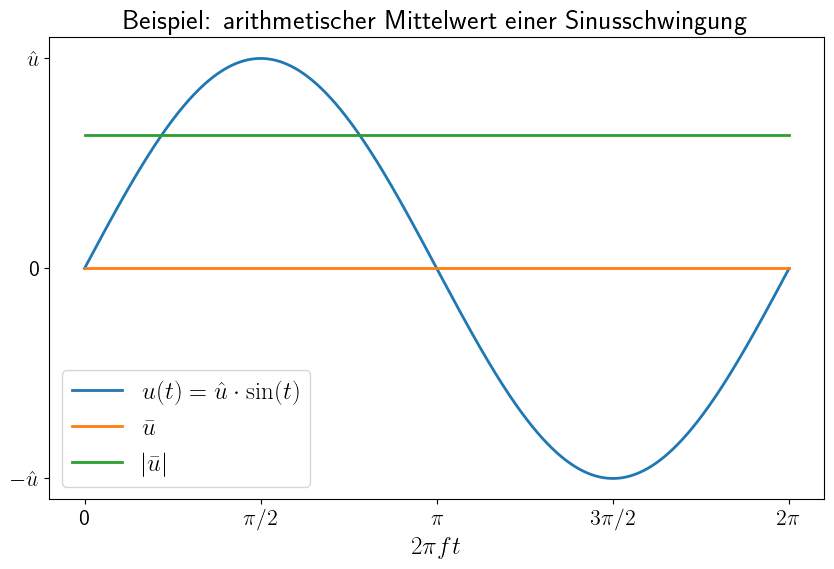

In [4]:
t = np.linspace(0,2*np.pi,1000)
u = np.sin(t)
umittel = np.mean(u)*np.ones(len(u))
ugleich = np.mean(np.abs(u))*np.ones(len(u))
plt.plot(t,u, label=r'$u(t)=\hat{u}\cdot\sin(t)$')
plt.plot(t,umittel, label = r'$\bar{u}$')
plt.plot(t,ugleich, label=r'$\vert\bar{u}\vert$')
plt.xticks([0,np.pi/2,np.pi, 3*np.pi/2, 2*np.pi],['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
plt.yticks([-1,0,1],[r'$-\hat{u}$','0',r'$\hat{u}$'])
plt.xlabel(r'$2\pi f t$')
plt.title('Beispiel: arithmetischer Mittelwert einer Sinusschwingung')
plt.legend()
plt.show()

**Quadratischer Mittelwert**

\begin{equation}
\bar{x^2} = \frac{1}{T}\int_t^{t+T}\left[x(t)\right]^2 dt
\end{equation}

*Anwendung: Leistungsmessung im Wechselstromkreis $P = \frac{\bar{u^2}}{R}=\bar{i^2}\cdot R$*

Effektivwert:

\begin{equation}
X = \sqrt{\bar{x^2}}
\end{equation}

Für Messsignale, die sich über mehrere Zehnerpotenzen verändern, z. B. EMV-Messungen, Verstärkungsverhältnisse von elektrischen Verstärkern:

Kennzeichnung durch dimensionslose Erweiterung Dezibel (dB)

**Definition Dezibel**:

\begin{equation}
X_{\text{dB}} = 20\lg\frac{X_2}{X_1}
\end{equation}

mit $X_1$ Eingangsgröße einer Übertragungseinrichtung und $X_2$ Ausgangsgröße

Lineares Übertragungsmaß zu einer Dezibelangabe:

\begin{equation}
\frac{X_2}{X_1}=10^{\frac{X_{\text{dB}}}{20}}
\end{equation}

**Leistung**: *quadratische Abhängigkeit* bezogen auf die Spannung über einem Widerstand

\begin{equation}
\left(\frac{P_2}{P_1}\right)_{\text{dB}} = 10\cdot \lg\frac{P_2}{P_1}
\end{equation}

## Tiefpassfilterung und Signalverzerrung

Beispiel: Tiefpass 1. Ordnung = RC-Glied

Übertragungsfunktion aus Spannungsteiler:

\begin{equation}
G(\omega) = \frac{u_a}{u_e} = \frac{\underline{Z_C}}{\underline{Z_R}+\underline{Z_C}} = \frac{\frac{1}{j\omega C}}{R+\frac{1}{j\omega C}} = \frac{1}{1+j\omega RC}
\end{equation}

für $\omega \to 0$: $G\to 1$, für $\omega \to \infty$: $G\to 0$

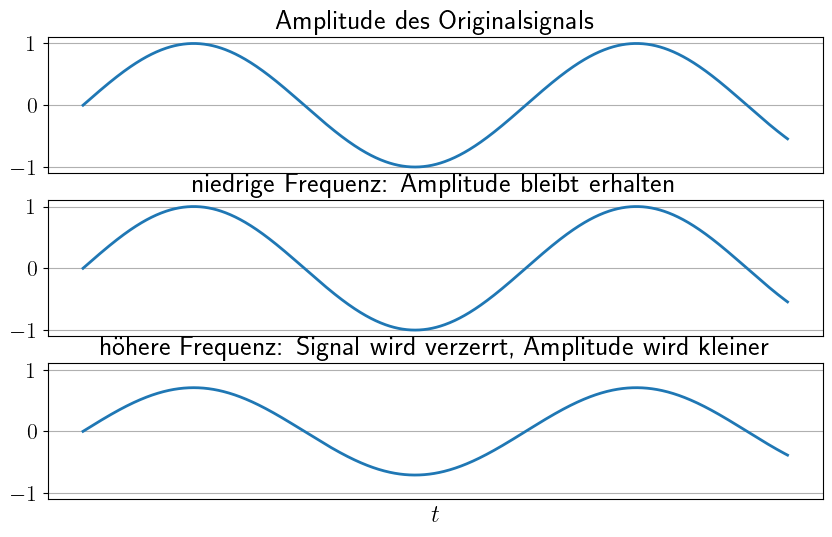

In [12]:
t = np.linspace(0,10,1000)
A0 = 1 # Amplitude am Anfang
A = A0*np.sin(t)
omega1 = 0.001
omega2 = 1
RC = 1
G1 = 1/(1+1j*omega1*RC)
G2 = 1/(1+1j*omega2*RC)
ax1 = plt.subplot(311)
ax1.plot(t,A)
ax1.grid()
ax1.set_xticks([])
ax1.set_title('Amplitude des Originalsignals')
ax2 = plt.subplot(312, sharex = ax1, sharey=ax1)
ax2.plot(t,A*np.abs(G1))
ax2.grid()
ax2.set_title('niedrige Frequenz: Amplitude bleibt erhalten')
ax3 = plt.subplot(313, sharex = ax1, sharey=ax1)
ax3.plot(t,A*np.abs(G2))
ax3.grid()
ax3.set_xlabel(r'$t$')
ax3.set_title('höhere Frequenz: Signal wird verzerrt, Amplitude wird kleiner')
plt.show()

## Verstärker wirken als Tiefpass

Verstärkung: Empfindlichkeit Verstärker {cite:p}`niebuhr_physikalische_2011`

\begin{equation}
A = \frac{\Delta U_a}{\Delta U_d}
\end{equation}

Frequenzgang = Tiefpass<br>
Ordnung des Tiefpass = f(# Verstärkerstufen) <br>$\to$ Frequenzgang-Korrektur: Tiefpass 1. Ordnung

\begin{equation}
-\frac{\underline{U_a}}{\underline{U_d}} = \underline{A} = \frac{A_0\cdot\exp(j\cdot\varphi)}{\sqrt{1+(f/fg)^2}}
\end{equation}

mit Grenzfrequenz $f_g$, Verstärkung bei $A_0$ bei $f=0$, $\tan\varphi=-f/fg$

**Anstiegsverzerrung vermeiden:** Anstiegsgeschwindigkeit Verstärker > max. Flankensteilheit Signal

\begin{equation}
du_a/dt \geq \omega \cdot\hat{u}
\end{equation}

![amp](../img/window-amp.png)

## Abtastung

Beispiel {cite:p}`werner_digitale_2019`: $x(t)=\cos(\omega_0 \cdot t) \leftrightarrow x(j\omega) = \pi\cdot \delta(\omega-\omega_0)+\pi\cdot\delta(\omega+\omega_0)$

![sample](../img/window-sample.png)

Die (ideale) Abtastung analoger Signale mit dem Abtastintervall $T_S$ kann durch die Multiplikation des Signals mit dem periodischen Impulskamm beschrieben werden.

\begin{equation}
p(t) = \sum_{n=-\infty}^{+\infty} \delta(t-n\cdot T_S)
\end{equation}

\begin{equation}
x_s(t) = x(t)\cdot p(t)
\end{equation}

Die Multiplikation der Signale im Zeitbereich entspricht der Faltung der Spektren der Signale. Das Spektrum eines abgetasteten Signals bestimmt sich also aus der periodischen Wiederholung des Signalspektrums mit der Periode $2/T_S$. 

\begin{equation}
X_S(j\omega) = \frac{1}{2\pi}\cdot X(j\omega)\ast P(j\omega)
\end{equation}

Da das Spektrum des periodischen Impulskammes wieder ein periodischer Impulskamm ist, gilt:

\begin{equation}
P(j\omega) = \frac{2\pi}{T_S}\cdot\sum_{k=-\infty}^{+\infty}\delta(\omega - 2\pi\cdot k/T_S) \rightarrow X_s (j\omega) = \frac{1}{T_S}\cdot\sum_{k=-\infty}^{+\infty} X(j[\omega - 2\pi\cdot k/T_S])
\end{equation}

Spektrum eines abgetasteten Signals = periodischer Wiederholung des Signalspektrums mit der Periode $2\pi/T_S$

![sampling](../img/window-sampling.png)

Anhand des Beispiels wird auch die Aussage des Abtasttheorems deutlich. Wird die Abtastfrequenz $f_s = 1/T_S$ etwas kleiner gewählt, nähern sich die periodischen Anteile im Spektrum gegenseitig an. Wird das Abtasttheorem verletzt, shiceben sich die Anteile ineinander. Man spricht von einer spektralen Überfaltung, Bandüberlappung oder Aliasing.

![samples](../img/window-samples.png)

Wird das Abtasttheorem eingehalten, tritt kein Aliasing auf. Es ergibt sich der einfache Zusammenhang zwischen dem Spektrum der Abtastfolge und dem Spektrum des abgetasteten Signals.

\begin{equation}
X_S\left(e^{j\Omega}\right) = \frac{1}{T_S}\cdot X\left(j\cdot \frac{\Omega}{T_S}\right)\text{ für }\vert \Omega\vert \leq \pi\text{ und }f_S\geq2\cdot f_g
\end{equation}

Spektrum eines zeitkontinuierlichen bandbegrenzten Signals (oben) und Spektrum seiner Abtastfolge (unten) wenn das Abtasttheorem eingehalten wird

![wo-alias](../img/window-wo-alias.png)

![aliasing](../img/window-aliasing.png)


## A/D-Wandler

Reale A/D-Wandler nehmen nicht nur eine Abtastung und damit eine Diskretisierung im Zeitbereich vor, sondern auch eine Quantisierung im Wertbereich {cite:p}`parthier_messtechnik:_2016`

Auflösung: Anzahl Bits

Abweichung infolge Quantisierung geringer mit höherer Auflösung

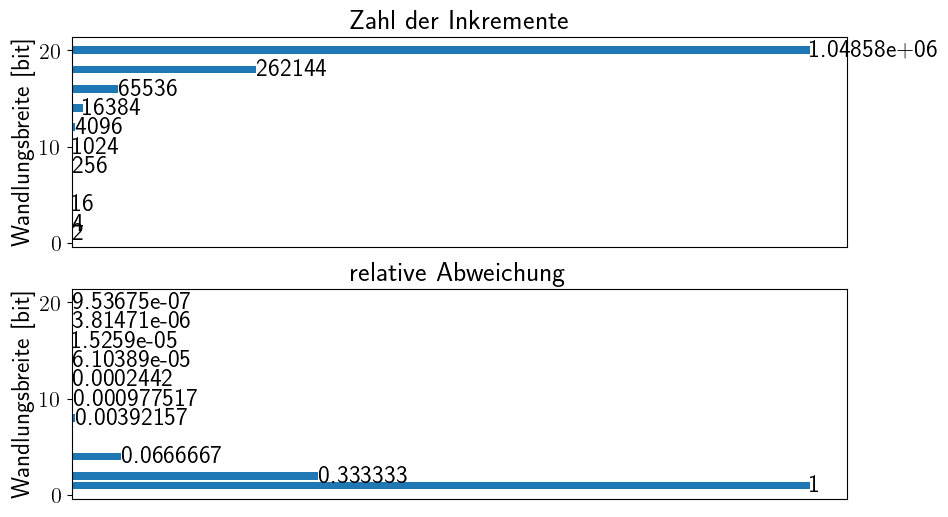

In [6]:
wandlungsbreite = np.array([1,2,4,8,10,12,14,16,18,20]) # in bit
anzahl_inkremente = 2**wandlungsbreite
arel = 1/(anzahl_inkremente -1)
ax1=plt.subplot(211)
ax1.barh(wandlungsbreite, anzahl_inkremente)
ax1.set_ylabel('Wandlungsbreite [bit]')
ax1.set_xticks([])
ax1.bar_label(ax1.containers[0], label_type='edge')
ax1.set_title('Zahl der Inkremente')
ax2=plt.subplot(212)
ax2.barh(wandlungsbreite, arel)
ax2.set_ylabel('Wandlungsbreite [bit]')
ax2.bar_label(ax2.containers[0], label_type='edge')
ax2.set_xticks([])
ax2.set_title('relative Abweichung')
plt.show()

Hohe Auflösung nur dann sinnvoll, wenn Messsystem und andere Komponenten des A/D-Wandlers damit arbeiten

Typischer Schwachpunkt: Genauigkeit Referenzspannungsquelle zur Darstellung LSB (least significant bit)<br>
Beispiel $\Delta U_{\text{ref}}=0,1\text{ Prozent}$ $\to$ Auflösung > 10 bit unsinnig

## Auswahl A/D-Wandler

**Langsame Signaländerungen**: Mittelwertmessung durch Integration über feste Zeit $\to$ Störunterdrückung überlagerter Wechselspannungen (Periode $T_{\text{AC}}$) besonders für Integrationszeiten $T_{\text{int}}=n\cdot T_{\text{AC}}$

Dämpfungsfaktor $D=\frac{\text{Amplitude}}{\text{Mittelwert in }T_{\text{int}}}$

Beispiel: Uf-Umformer

**Mittlere Signaländerungen**: Beispiel: A/D-Wandler nach dem Prinzip der sukzessiven Approximation

**Schnelle Signaländerungen**: Augenblickswert-Messung: Grenzfrequenz > 10 MHz möglich, Beispiel Flash-Converter

![adc](../img/window-adc.png)

## Fensterung

Zur Anwendung der DFT ist es meist erforderlich, die Eingangsfolge auf eine bestimmte Länge zu begrenzen {cite:p}`werner_digitale_2019`.

Zeitbereich:

\begin{equation}
x_w[n]=x[n]\cdot w[n]
\end{equation}

\begin{equation}
w[n]=\begin{Bmatrix} 1\text{ für }0 \leq n\leq N-1\\ 0 \text{ sonst}\\ \end{Bmatrix}
\end{equation}

![time](../img/window-time.png)

Frequenzbereich:

\begin{equation}
W(e^{j\Omega}) = \sum_{n=0}^{N-1} w[n]\cdot e^{-j\Omega\frac{N}{2}} \cdot\frac{\sin(N\cdot \Omega/2)}{\sin(\Omega/2)}
\end{equation}

![peaks](../img/window-peaks.png)

Die Multiplikation der Folgen $x[n]$ und $w[n]$ im Zeitbereich entspricht der Faltung der Spektren $X[k]$ und $W[k]$ im Frequenzbereich:

\begin{equation}
X_w(e^{j\Omega}) = \frac{1}{2\pi}\cdot X(e^{j\Omega})\ast W(e^{j\Omega}) \leftrightarrow X_w (e^{j\Omega}) = \frac{1}{2} W(e^{j\cdot(\Omega-\Omega_0)})+\frac{1}{2}\cdot W(e^{j\cdot(\Omega+\Omega_0)})
\end{equation}

![windowing](../img/windowing.png)

Ein Gütekriterium für die Spektralanalyse ist die spektrale Auflösung, d.h. die Fähigkeit im Spektrum feine Strukturen zu unterscheiden, ähnlich der Fähigkeit des Menschen, räumliche oder zeitliche Details in Bildern oder Musikstücken zu erkennen.

![res](../img/window-resolution.png)

Je kleiner die Hauptzipfelbreite, umso höher (feiner) das Auflösungsvermögen und desto feinere Strukturen können im originalen Signalspektrum anhand des DFT-Spektrums erkannt werden. Durch Verlängerung des Fensters wird die spektrale Auflösung geringer und damit feiner.

## Beispiele für Fensterfolgen

Die Qualität der Kurzzeit-Spektralanalyse wird durch die Fensterung des Zeitsignals wesentlich beeinflusst. Nicht nur die Länge des Fensters sondern auch seine Form spielt eine wichtige Rolle. Die einfachste Fensterfolge ist die Rechteckfolge - einfach "Ausschneiden". Bei den anderen Fensterfolgen werden die Signalausschnitte zusätzlich mit einer Amplitude bewertet, um bestimmte Effekte zu erreichen.

/tmp/ipykernel_74557/3014647359.py:8: RuntimeWarning: divide by zero encountered in log10
  bartlett_response = 20 * np.log10(np.abs(fftshift(bartlett_f / abs(bartlett_f).max())))
/tmp/ipykernel_74557/3014647359.py:9: RuntimeWarning: divide by zero encountered in log10
  blackman_response = 20 * np.log10(np.abs(fftshift(blackman_f / abs(blackman_f).max())))


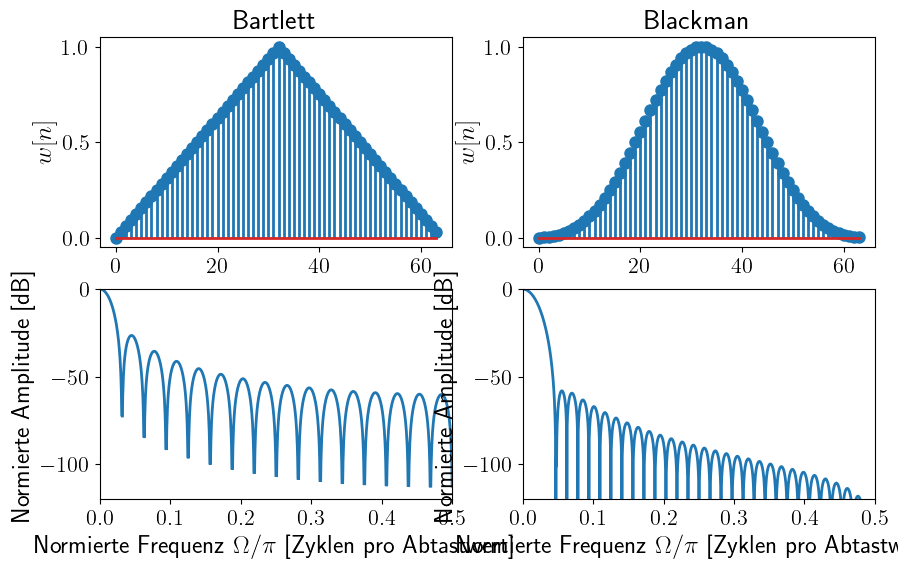

In [7]:
n = np.linspace(0,63,64)
bartlett = signal.get_window('bartlett', len(n))
blackman = signal.get_window('blackman', len(n))
bartlett_f = fft(bartlett, 2048) / (len(bartlett)/2.0)
blackman_f = fft(blackman, 2048) / (len(blackman)/2.0)
bartlett_freq = np.linspace(-0.5, 0.5, len(bartlett_f))
blackman_freq = np.linspace(-0.5, 0.5, len(blackman_f))
bartlett_response = 20 * np.log10(np.abs(fftshift(bartlett_f / abs(bartlett_f).max())))
blackman_response = 20 * np.log10(np.abs(fftshift(blackman_f / abs(blackman_f).max())))
ax1 = plt.subplot(221)
ax1.stem(n,bartlett)
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$w[n]$')
ax1.set_title('Bartlett')
ax2 = plt.subplot(222)
ax2.stem(n,blackman)
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$w[n]$')
ax2.set_title('Blackman')
ax3 = plt.subplot(223)
ax3.plot(bartlett_freq,bartlett_response)
ax3.axis([0, 0.5, -120, 0])
ax3.set_ylabel("Normierte Amplitude [dB]")
ax3.set_xlabel(r"Normierte Frequenz $\Omega/\pi$ [Zyklen pro Abtastwert]")
ax4 = plt.subplot(224)
ax4.plot(blackman_freq,blackman_response)
ax4.axis([0, 0.5, -120, 0])
ax4.set_ylabel("Normierte Amplitude [dB]")
ax4.set_xlabel(r"Normierte Frequenz $\Omega/\pi$ [Zyklen pro Abtastwert]")
plt.show()

## Bewertungskriterien für Fensterfunktionen

Beispiel: Rechteckfenster der Länge = 16 <br>
3dB-Breite des Hauptmaximums

/tmp/ipykernel_74557/1615516411.py:5: RuntimeWarning: divide by zero encountered in log10
  boxcar_response = 20 * np.log10(np.abs(fftshift(boxcar_f / abs(boxcar_f).max())))


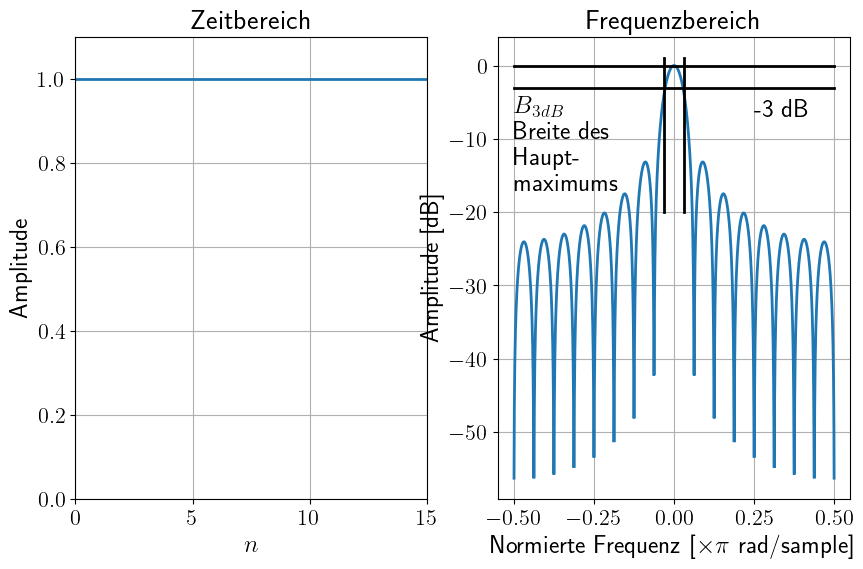

In [14]:
n = np.linspace(0,15,16)
boxcar = signal.get_window('boxcar', len(n))
boxcar_f = fft(boxcar, 2048) / (len(boxcar)/2.0)
boxcar_freq = np.linspace(-0.5, 0.5, len(boxcar_f))
boxcar_response = 20 * np.log10(np.abs(fftshift(boxcar_f / abs(boxcar_f).max())))
ax1 = plt.subplot(121)
ax1.plot(n,boxcar)
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'Amplitude')
ax1.set_title('Zeitbereich')
ax1.axis([0,np.max(n),0,1.1])
ax1.grid()
ax2 = plt.subplot(122)
ax2.plot(boxcar_freq,boxcar_response)
ax2.set_xlabel(r'Normierte Frequenz [$\times \pi$ rad/sample]')
ax2.set_ylabel('Amplitude [dB]')
ax2.set_title('Frequenzbereich')
ax2.grid()
ax2.plot([-0.5,0.5],[0,0],'k-')
ax2.plot([-0.5,0.5],[-3,-3],'k-')
ax2.text(0.25,-7,'-3 dB')
ax2.plot([-0.03,-0.03],[-20,1],'k-')
ax2.plot([0.03,0.03],[-20,1],'k-')
ax2.text(-0.5,-17,'$B_{3dB}$ \nBreite des \nHaupt-\nmaximums')
plt.show()

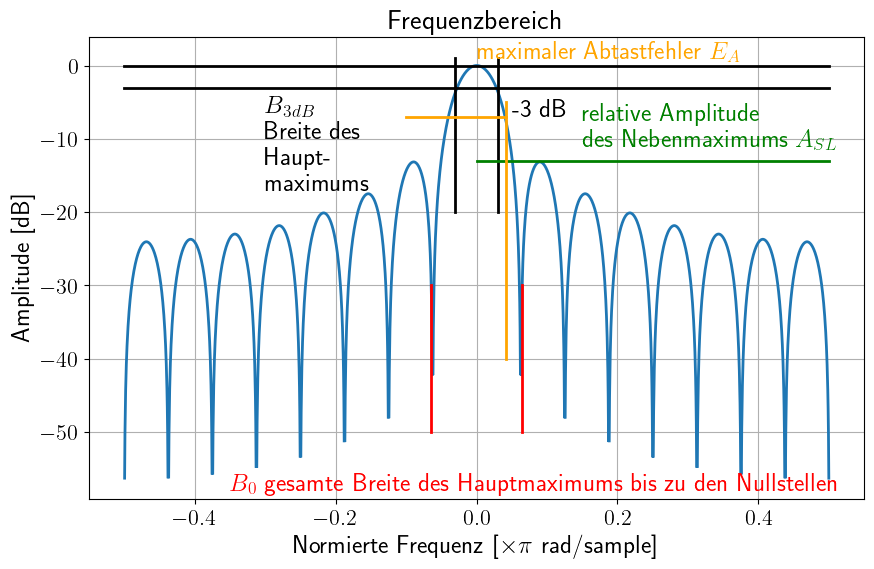

In [9]:
plt.plot(boxcar_freq,boxcar_response)
plt.xlabel(r'Normierte Frequenz [$\times \pi$ rad/sample]')
plt.ylabel('Amplitude [dB]')
plt.title('Frequenzbereich')
plt.grid()
plt.plot([-0.5,0.5],[0,0],'k-')
plt.plot([-0.5,0.5],[-3,-3],'k-')
plt.text(0.05,-7,'-3 dB')
plt.plot([-0.03,-0.03],[-20,1],'k-')
plt.plot([0.03,0.03],[-20,1],'k-')
plt.text(-0.3,-17,'$B_{3dB}$ \nBreite des \nHaupt-\nmaximums')
plt.plot([-0.065,-0.065],[-50,-30],'r-')
plt.plot([0.065,0.065],[-50,-30],'r-')
plt.text(-0.35,-58,'$B_0$ gesamte Breite des Hauptmaximums bis zu den Nullstellen', color='r')
plt.plot([0,0.5],[-13,-13],'g-')
plt.text(0.15,-11,'relative Amplitude \ndes Nebenmaximums $A_{SL}$', color='g')
plt.plot([2/(np.pi*np.max(n)),2/(np.pi*np.max(n))],[-40,-5],color='orange')
plt.plot([-.1,2/(np.pi*np.max(n))],[-7,-7],color='orange')
plt.text(0,1,'maximaler Abtastfehler $E_A$',color='orange')
plt.show()

## Kennwerte von Fensterfolgen der Länge N = 64

| **Fensterfolge** | **$\Delta \Omega_{3dB}/\pi$** | **$\Delta \Omega_m$** | **$a_{s,dB}$** | **Kommentar** |
|---|---|---|---|---|
| Bartlett | 0,0391 | $8\pi/N$ | 26,5 dB | Dreieckförmiges Fenster mit effektiver Länge $N-2$, vgl. Fenster `triang` |
| Blackmann | 0,0508 | $12\pi/N$ | 58,1 dB | Relativ breiter Hauptzipfel und schnell abfallendes Betragsspektrum | 
| Chebyshev ($\alpha = 60\text{ dB}$) | | $10\pi/N$ | | Parametrisierbares Fenster: Austausch zwischen spektraler Auflösung und einstellbarer Nebenzipfeldämpfung ($\alpha$), Nebenzipfeldämpfung im gesamten Bereich konstant - gut zur Unterdrückung breitbandiger Störung |
| Gaussian ($\beta = 2,5$) | | $13\pi/N$ | | Parametrisierbares Fenster: die gaußsche Glockenkurve bleibt bei Fourier-Transformation erhalten, weshalb der Hauptzipfel im Wesentlichen die Form einer gaußschen Glockenkurve besitzt, guter Kompromiss zwischen Zeit- und Frequenzauflösung | 
| Hamming | | $8\pi/N$ | | Vergleichbar mit Chebyshev-Fenster mit der Dämpfung 42 dB, wird als Kompromiss in der Kurzzeit-Spektralanalyse häufig eingesetzt |
| Kaiser ($\beta = 5,4$) | | $8\pi/N$ | | Parametrisierbares Fenster mit Austausch zwischen spektraler Auflösung und Nebenzipfeldämpfung, früher beim Entwurf von Tiefpassfiltern eingesetzt |
| Rectangular | 0,0273 | $4\pi/N$ | 13,3 dB | Rechteckförmiges Fenster mit Länge $N$, bestmögliche spektrale Auflösung und geringste Nebenzipfeldämpfung |

mit {cite:p}`werner_digitale_2019` ungefährer Breite des Hauptzipfels (bzgl. der norm. Kreisfrequenz) $\Omega_{3dB}/\pi$ bzw. $\Delta\Omega_m$ und Dämpfung des größten Nebenzipfels $a_{s,dB}$

## Übungsaufgaben

### Leistung einer Wechselstromquelle

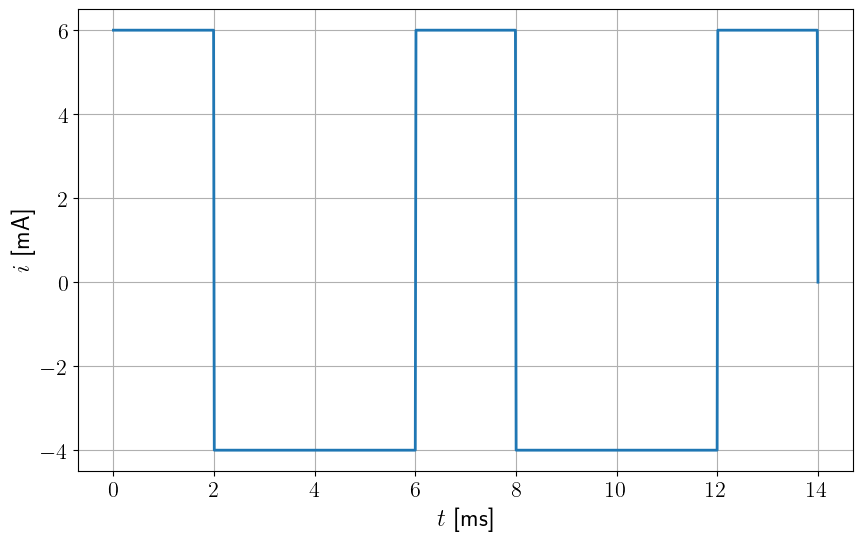

In [10]:
t = np.linspace(0,14e-3,1000) # Zeit in s
i = np.piecewise(t, [t < 2e-3, 
                     (t >= 2e-3) & (t < 6e-3),
                    (t >= 6e-3) & (t < 8e-3),
                    (t >= 8e-3) & (t < 12e-3),
                    (t >= 12e-3) & (t < 14e-3),
                    t > 14e-3], 
                 [lambda t: 6e-3, 
                  lambda t: -4e-3,
                 lambda t: 6e-3,
                 lambda t: -4e-3,
                 lambda t: 6e-3,
                 lambda t: -4e-3]) # Strom in A
plt.plot(1000*t,1000*i)
plt.xlabel(r'$t$ [ms]')
plt.ylabel(r'$i$ [mA]')
plt.grid()
plt.show()

Eine Stromquelle liefert einen Rechteckpuls lt. Diagramm. Das Messinstrument hat einen Innenwiderstand von $R_i = 0,3\text{ }\Omega$. Wie groß ist der arithmetische Mittelwert des Stroms? Wie groß ist die umgesetzte Leistung im Instrument?

*Lösung an der Tafel*

### Aliasing vermeiden

Ein Messsignal besitzt als höchsten Frequenzanteil eine Frequenz von $f_{\text{max}}=16\text{ kHz}$. Mit welcher Frequenz muss dieses Signal mindestens abgetastet werden, wenn durch die Zeitdiskretisierung kein Informationsverlust auftreten soll?

*Lösung an der Tafel*

### A/D-Wandler

Bei der Integrationszeit $T_{\text{int}}=1\text{ ms}$ für eine 50 Hz-Störwechselspannung (vom Netz) ist $D=(\pi\cdot50\text{ Hz}\cdot1\text{ ms}/(\sin(\pi\cdot50\text{ Hz}\cdot1\text{ ms})=1,004$ und das Dämpfungsmaß $D=20\lg D=0,036\text{ dB}$, also nahezu keine Dämpfung. Berechnen Sie für $f=750,5\text{ kHz}$ (von einem Mittelwellensender) Dämpfung und Dämpfungsmaß desselben Uf-Umformers.

Für welche Integrationszeiten ist die Dämpfung einer Sinusspannung mit Netzfrequenz $f=50\text{ Hz}$ besonders groß? Wie groß ist die Dämpfung für eine Integrationszeit von $100\text{ ms}$ für jeweils die europäische (50 Hz) und die amerikanische Netzfrequenz (60 Hz)?

*Lösung an der Tafel*

```{bibliography}
:filter: docname in docnames
```